## <i> <span style='color:red'>NEURAL NETWORK-GAS TURBINES DATA</i></span> 

### PROBLEM STATMENT: Predicting turbine energy yield (TEY) using ambient variables as features, with the help of Neural network.

In [1]:
#  Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential

from tensorflow.python.keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset
data = pd.read_csv("gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
data1=data[['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX','TEY']]
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,110.74


In [4]:
# Basic informations about the data

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   CDP     15039 non-null  float64
 8   CO      15039 non-null  float64
 9   NOX     15039 non-null  float64
 10  TEY     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
data1.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
TEY     0
dtype: int64

In [6]:
data1[data1.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY


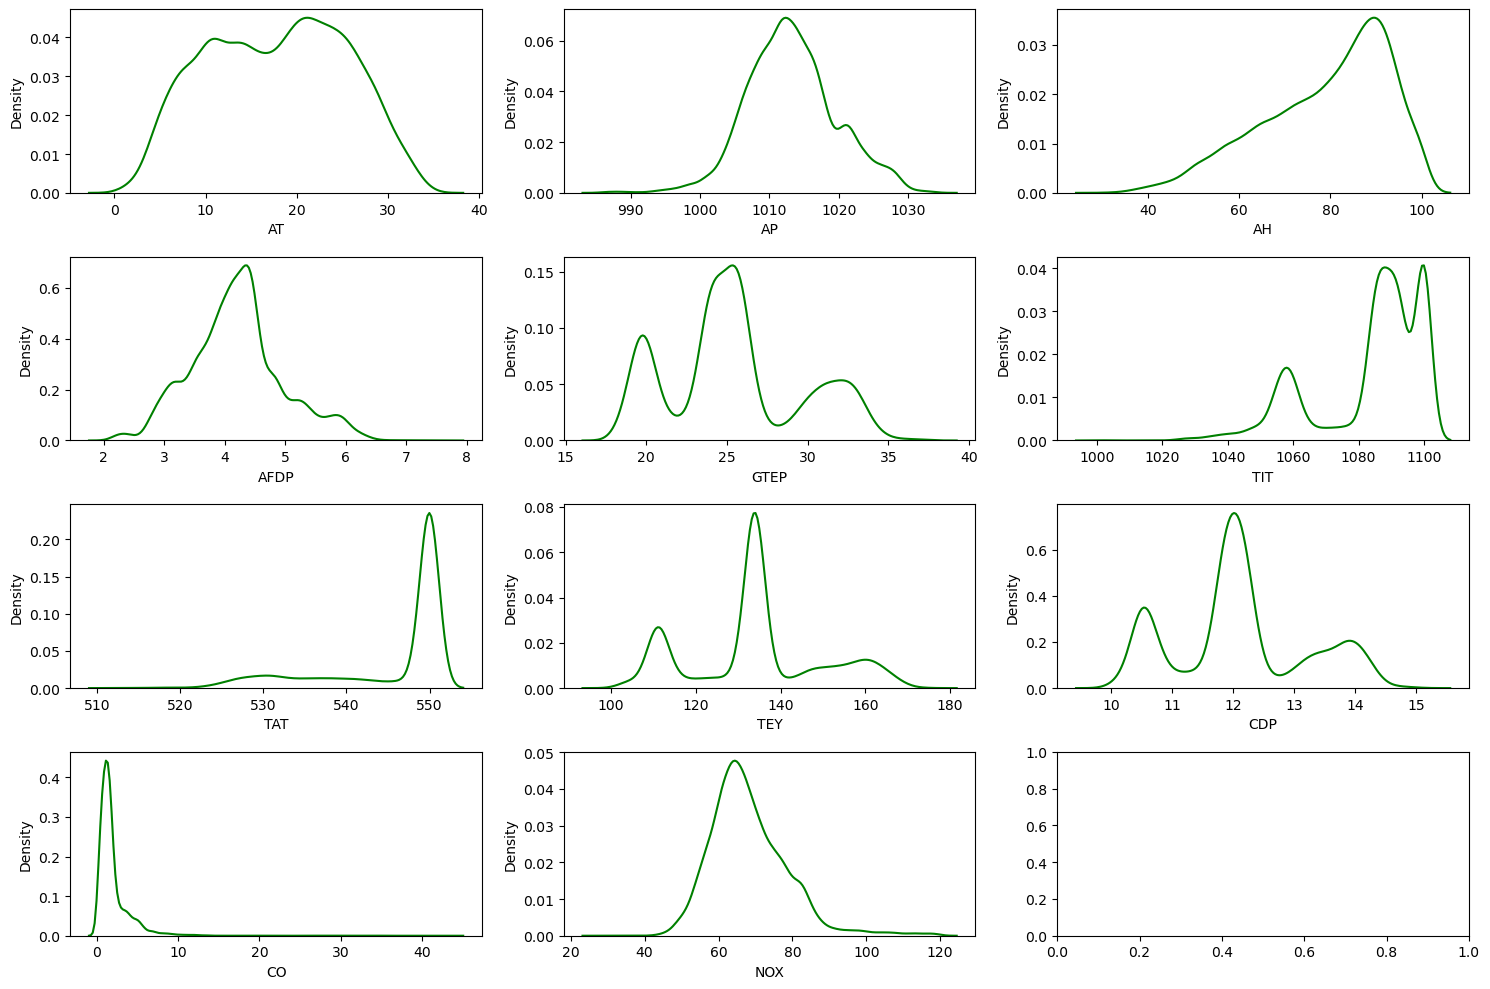

In [7]:
#  Visualization of the dataset
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.kdeplot(data1.AT, ax=ax[0,0],color='g')
sns.kdeplot(data1.AP, ax=ax[0,1],color='g')
sns.kdeplot(data1.AH, ax=ax[0,2],color='g')
sns.kdeplot(data1.AFDP, ax=ax[1,0],color='g')
sns.kdeplot(data1.GTEP, ax=ax[1,1],color='g')
sns.kdeplot(data1.TIT, ax=ax[1,2],color='g')
sns.kdeplot(data1.TAT, ax=ax[2,0],color='g')
sns.kdeplot(data1.TEY, ax=ax[2,1],color='g')
sns.kdeplot(data1.CDP, ax=ax[2,2],color='g')
sns.kdeplot(data1.CO, ax=ax[3,0],color='g')
sns.kdeplot(data1.NOX, ax=ax[3,1],color='g')

plt.tight_layout()
plt.show()

In [8]:
scale=MinMaxScaler()
data1=pd.DataFrame(scale.fit_transform(data),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX'])
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder_data1 = LabelEncoder()
data1=data1.apply(LabelEncoder().fit_transform)
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1230,292,12092,2208,787,292,2285,707,461,10695,10885
1,1199,297,12149,2207,842,293,2285,709,454,10775,10892
2,1251,301,11882,2148,883,294,2272,708,457,10746,10835
3,1334,305,11699,2138,892,296,2284,709,462,10738,10875
4,1505,310,11676,2197,871,297,2283,709,468,10782,10774
...,...,...,...,...,...,...,...,...,...,...,...
15034,2278,269,12369,2376,382,197,1964,491,256,11809,10229
15035,1732,272,12467,2230,577,163,1742,508,289,12015,10317
15036,1433,276,12533,2121,675,83,1247,352,339,12818,11571
15037,1302,281,12449,2009,545,135,1583,406,389,12579,11636


In [10]:
data1['TEY'].describe()

count    15039.00000
mean      1818.09994
std        999.24952
min          0.00000
25%       1344.50000
50%       1739.00000
75%       2191.50000
max       4206.00000
Name: TEY, dtype: float64

In [11]:
data1['TEY_New']=pd.cut(data1.TEY,bins=[0,1739,4206],labels=[0,1])
data2=data1.drop(['TEY'],axis=1)
data2

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY_New
0,1230,292,12092,2208,787,292,2285,461,10695,10885,0
1,1199,297,12149,2207,842,293,2285,454,10775,10892,0
2,1251,301,11882,2148,883,294,2272,457,10746,10835,0
3,1334,305,11699,2138,892,296,2284,462,10738,10875,0
4,1505,310,11676,2197,871,297,2283,468,10782,10774,0
...,...,...,...,...,...,...,...,...,...,...,...
15034,2278,269,12369,2376,382,197,1964,256,11809,10229,0
15035,1732,272,12467,2230,577,163,1742,289,12015,10317,0
15036,1433,276,12533,2121,675,83,1247,339,12818,11571,0
15037,1302,281,12449,2009,545,135,1583,389,12579,11636,0


In [12]:
data2.isnull().sum()

AT         0
AP         0
AH         0
AFDP       0
GTEP       0
TIT        0
TAT        0
CDP        0
CO         0
NOX        0
TEY_New    1
dtype: int64

In [13]:
data2.TEY_New.fillna(0,inplace=True)

In [14]:
data2.isnull().sum()

AT         0
AP         0
AH         0
AFDP       0
GTEP       0
TIT        0
TAT        0
CDP        0
CO         0
NOX        0
TEY_New    0
dtype: int64

In [15]:
data2.TEY_New.unique()

[0, 1]
Categories (2, int64): [0 < 1]

In [16]:
data3 = data2.values
data3

array([[ 1230,   292, 12092, ..., 10695, 10885,     0],
       [ 1199,   297, 12149, ..., 10775, 10892,     0],
       [ 1251,   301, 11882, ..., 10746, 10835,     0],
       ...,
       [ 1433,   276, 12533, ..., 12818, 11571,     0],
       [ 1302,   281, 12449, ..., 12579, 11636,     0],
       [ 1266,   285, 12227, ..., 12087, 11620,     0]], dtype=int64)

In [17]:
X = data3[:,0:10]
y = data3[:,10]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33)

### Constructing a Sequential neural network with
### input neurons:32neurons  
###  hidden layer :10 neurons 
### output layer:1neuron


In [19]:
model = Sequential()
model.add(Dense(32, input_dim=10, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

### Model Fitting

In [21]:
hist=model.fit(X,y,validation_split=0.2, epochs=100, batch_size=32)

Epoch 1/100
376/376 [==============================] - 2s 2ms/step - loss: 0.3641 - acc: 0.7982 - val_loss: 0.2650 - val_acc: 0.8551
Epoch 2/100
376/376 [==============================] - 1s 2ms/step - loss: 0.3023 - acc: 0.8390 - val_loss: 0.2475 - val_acc: 0.8534
Epoch 3/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2914 - acc: 0.8490 - val_loss: 0.2756 - val_acc: 0.8501
Epoch 4/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2824 - acc: 0.8535 - val_loss: 0.2267 - val_acc: 0.8693
Epoch 5/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2706 - acc: 0.8635 - val_loss: 0.3002 - val_acc: 0.8391
Epoch 6/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2667 - acc: 0.8634 - val_loss: 0.2521 - val_acc: 0.8587
Epoch 7/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2656 - acc: 0.8655 - val_loss: 0.2296 - val_acc: 0.8760
Epoch 8/100
376/376 [==============================] - 1s 2ms/step - 

376/376 [==============================] - 1s 2ms/step - loss: 0.2305 - acc: 0.8875 - val_loss: 0.2233 - val_acc: 0.8936
Epoch 63/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2309 - acc: 0.8889 - val_loss: 0.2130 - val_acc: 0.8893
Epoch 64/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2313 - acc: 0.8872 - val_loss: 0.2533 - val_acc: 0.8747
Epoch 65/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2364 - acc: 0.8840 - val_loss: 0.2599 - val_acc: 0.8627
Epoch 66/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2333 - acc: 0.8862 - val_loss: 0.2073 - val_acc: 0.8900
Epoch 67/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2334 - acc: 0.8867 - val_loss: 0.2361 - val_acc: 0.8773
Epoch 68/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2296 - acc: 0.8901 - val_loss: 0.2603 - val_acc: 0.8690
Epoch 69/100
376/376 [==============================] - 1s 2ms/step - loss:

###  Model Evaluation

In [22]:
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: 0.2361 - acc: 0.8851
acc: 88.51%


In [23]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

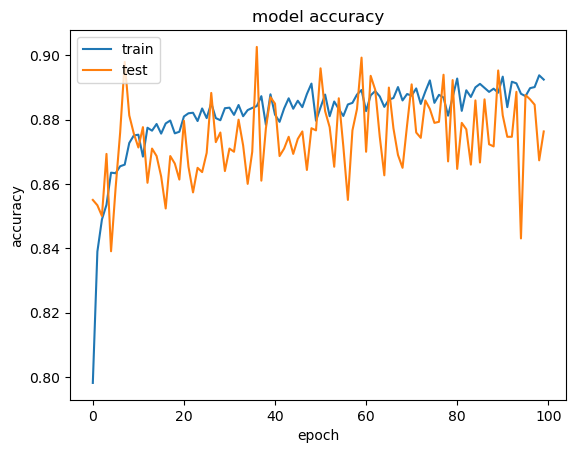

In [24]:
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

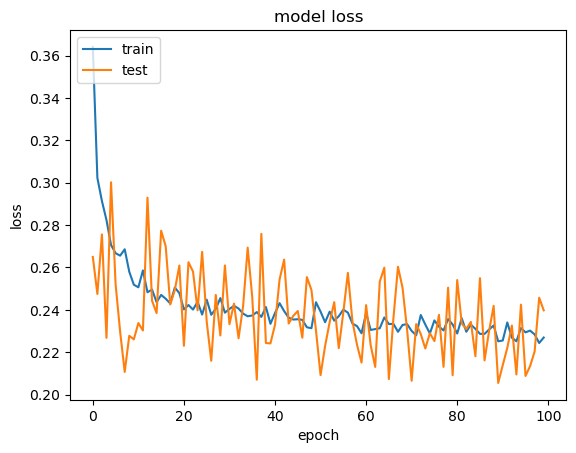

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Inference:

### The neural network helps predicting the turbine energy yield (TEY) using ambient variables as features, with the accuracy score 89% with loss -23889898738024448.0000
